In [12]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy.fftpack import fft
from scipy.ndimage.filters import gaussian_filter

from sklearn.metrics import f1_score
# import tensorflow_addons as ta

plt.style.use('seaborn')

### Import Data

In [2]:
from utils import data

In [9]:
x_train, y_train = data.load_training_data()

In [13]:
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of x_train: (45360, 512, 3)
Shape of y_train: (45360,)


In [97]:
# Add channel dimension for CNN
x_train_cnn = np.expand_dims(x_train, axis=3)

In [98]:
print(f'Shape of x_train_cnn: {x_train_cnn.shape}')

Shape of x_train_cnn: (45360, 512, 3, 1)


### Preprocessing

In [48]:
# Apply Gaussian filter
x_train_gauss = x_train.copy()

for i in range(x_train.shape[-1]):
    x_train_gauss[:, :, i] = gaussian_filter(x_train[:, :, i], sigma=2)

# x_train_gauss = gaussian_filter(x_train, sigma=5)

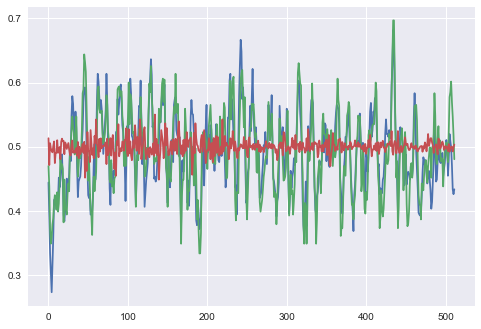

In [43]:
plt.plot(x_train[0])

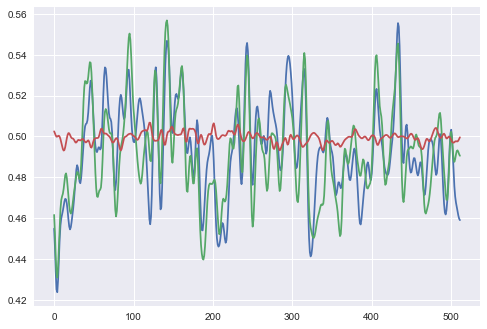

In [49]:
plt.plot(x_train_gauss[0])

### Build CNN model

In [23]:
# Generate weights for training, since the classes are imbalanced
class_weight = {}

count_0, count_1, count_2 = np.bincount(y_train)
total = count_0 + count_1 + count_2

weight_0 = (1 / count_0) * total
weight_1 = (1 / count_1) * total
weight_2 = (1 / count_2) * total

class_weight[0] = weight_0
class_weight[1] = weight_1
class_weight[2] = weight_2

In [46]:
# Basically model from exercise sheet 7
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=16, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_size=(10), 
                        activation='relu', kernel_regularizer='l2', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2, strides=2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax', kernel_regularizer='l2')
])

model_cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
# 2D CNN
model_cnn_2 = keras.Sequential([
    # Temporal convolution
    keras.layers.Conv2D(filters=8, kernel_size=(64, 1) , padding='same', 
                        input_shape=(x_train.shape[1], x_train.shape[2], 1)),
    keras.layers.BatchNormalization(axis=-2),
    # keras.layers.DepthwiseConv2D(kernel_size=(x_train.shape[2], 1)),
    keras.layers.AveragePooling2D(pool_size=(4, 1)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax', kernel_regularizer='l2')
])

model_cnn_2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history_cnn = model_cnn.fit(x_train_gauss, y_train, epochs=10, class_weight=class_weight, 
                            shuffle=True)

Epoch 1/10
45360/45360 [==============================] - 8s 170us/sample - loss: 3.2962 - acc: 0.3093
Epoch 2/10
45360/45360 [==============================] - 8s 175us/sample - loss: 3.2963 - acc: 0.3030
Epoch 3/10
45360/45360 [==============================] - 8s 172us/sample - loss: 3.2962 - acc: 0.2509
Epoch 4/10
45360/45360 [==============================] - 9s 191us/sample - loss: 3.2962 - acc: 0.2855
Epoch 5/10
45360/45360 [==============================] - 8s 181us/sample - loss: 3.2963 - acc: 0.3308
Epoch 6/10
45360/45360 [==============================] - 9s 194us/sample - loss: 3.2962 - acc: 0.2597
Epoch 7/10
45360/45360 [==============================] - 8s 182us/sample - loss: 3.2964 - acc: 0.2900
Epoch 8/10
45360/45360 [==============================] - 8s 184us/sample - loss: 3.2962 - acc: 0.2505
Epoch 9/10
45360/45360 [==============================] - 8s 177us/sample - loss: 3.2963 - acc: 0.3523
Epoch 10/10
45360/45360 [==============================] - 11s 235us/samp

In [ ]:
history_cnn_2 = model_cnn_2.fit(x_train_cnn, y_train, epochs=10, class_weight=class_weight, 
                            shuffle=True)

Epoch 1/10
34048/45360 [=====================>........] - ETA: 19s - loss: 3.3496 - acc: 0.3065